<a href="https://www.kaggle.com/code/kparthiban007/mushroom-binary-classification?scriptVersionId=207949399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Importing the Dataset 

In [2]:
# Reading the Data as a Pandas dataframe
df_train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')


# Exploratory Data Analysis (EDA)

In [3]:
df_train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
# information about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [6]:
print("No of unique values in each column : \n")

for col in df_train.columns:
    print(f"{col} : {df_train[col].nunique()} unique values")

No of unique values in each column : 

id : 3116945 unique values
class : 2 unique values
cap-diameter : 3913 unique values
cap-shape : 74 unique values
cap-surface : 83 unique values
cap-color : 78 unique values
does-bruise-or-bleed : 26 unique values
gill-attachment : 78 unique values
gill-spacing : 48 unique values
gill-color : 63 unique values
stem-height : 2749 unique values
stem-width : 5836 unique values
stem-root : 38 unique values
stem-surface : 60 unique values
stem-color : 59 unique values
veil-type : 22 unique values
veil-color : 24 unique values
has-ring : 23 unique values
ring-type : 40 unique values
spore-print-color : 32 unique values
habitat : 52 unique values
season : 4 unique values


In [7]:
# No of null values in Each Column 
df_train.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [8]:
Missing = df_train.isna().mean()*100 # percentage of missing columns
High_missing_columns = Missing[Missing>0]
High_missing_columns.reset_index() 
High_missing_columns.sort_values(ascending=False,inplace =True)
High_missing_columns

veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0.001444
cap-shape                0.001283
stem-color               0.001219
has-ring                 0.000770
cap-color                0.000385
does-bruise-or-bleed     0.000257
cap-diameter             0.000128
dtype: float64

In [9]:
# bar plot represents the missing percentage of each column in visual form
fig = px.bar(High_missing_columns, x=High_missing_columns.index,y=High_missing_columns.values,
             labels={'features': 'Columns', 'Missing': 'Percentage of Missing Values'},
             title='Percentage of Missing Values in train Column')

fig.show()

In [10]:
missing_columns = df_train.columns[df_train.isnull().mean()>0.2]
df_train.drop(columns=missing_columns,inplace=True)

## Data Cleaning

In [11]:
# Filling the Missing Data with null values to make it easier to handle
train_df= df_train.fillna(np.nan)
test_df = df_test.fillna(np.nan)

In [12]:
test_df.columns

Index(['id', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [13]:
# checking for duplicates in the dataset
print("There are {} duplicates in train dataset.".format(train_df.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(test_df.duplicated().sum()))

There are 0 duplicates in train dataset.
There are 0 duplicates in test dataset.


In [14]:
# value count of target classes
classes = train_df['class'].value_counts()
classes.reset_index()

,class,count
0,p,1705396
1,e,1411549


## Data Visualization

In [15]:
# donut plot visualization of target class : e - edible , p - poisonous
fig = go.Figure(data=[go.Pie(labels=['Poisonous','Edible'], values=classes.values,hole = .4,marker = dict(colors = ['red','green']))])
fig.update_layout(title_text='Classes of Mushroom')
fig.show()

In [16]:
# separating the numerical and categorical columns for efficient handling of data 
categorical_columns =train_df.select_dtypes(include = 'object').drop(columns=['class'])
categorical_columns =categorical_columns.columns

numerical_columns = train_df.select_dtypes(exclude = 'object').drop(columns= ['id'])
numerical_columns = numerical_columns.columns
print(f'categorical_columns : {categorical_columns}')
print(f'numerical_columns : {numerical_columns}')



categorical_columns : Index(['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
       'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')
numerical_columns : Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


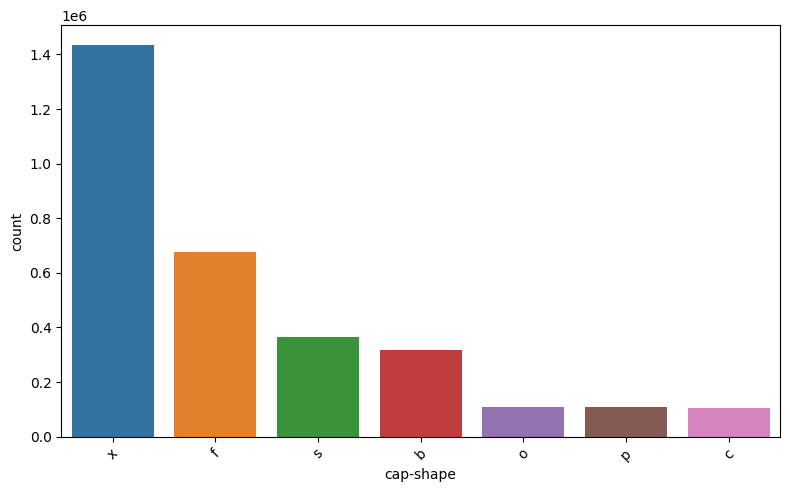

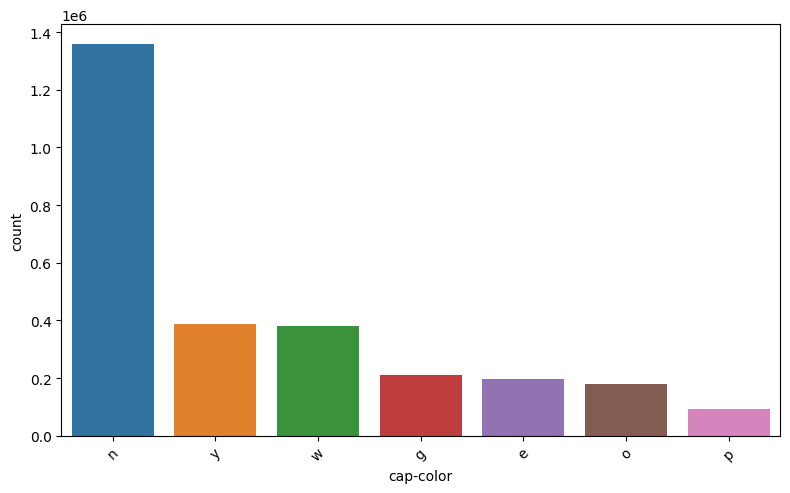

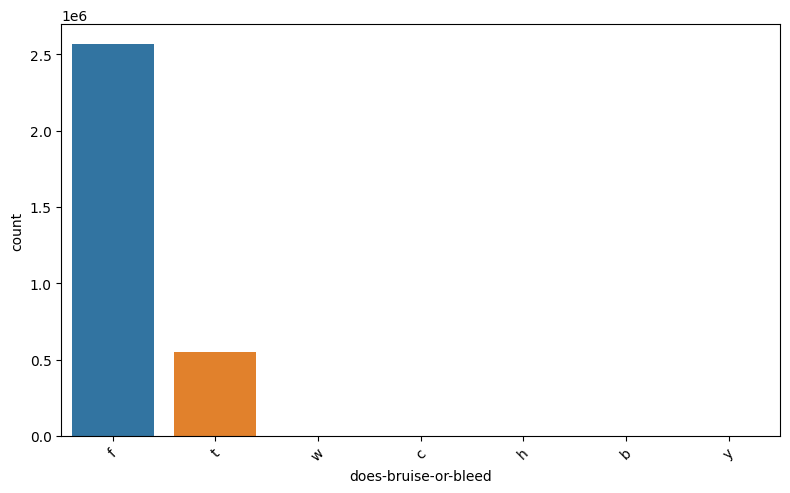

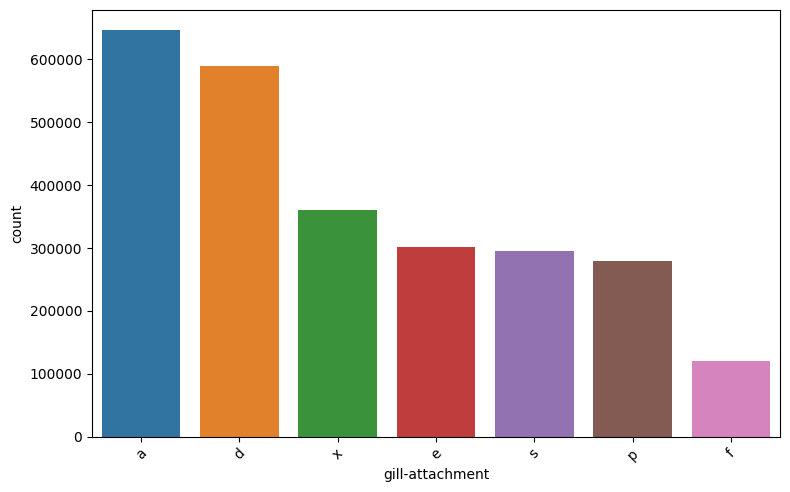

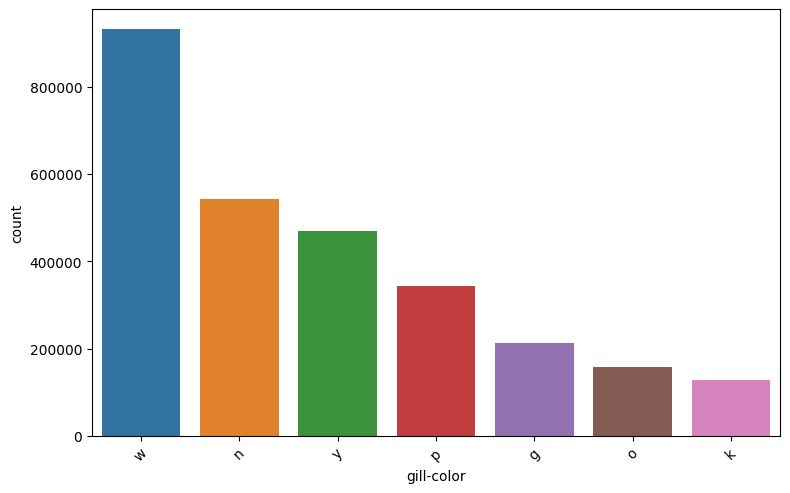

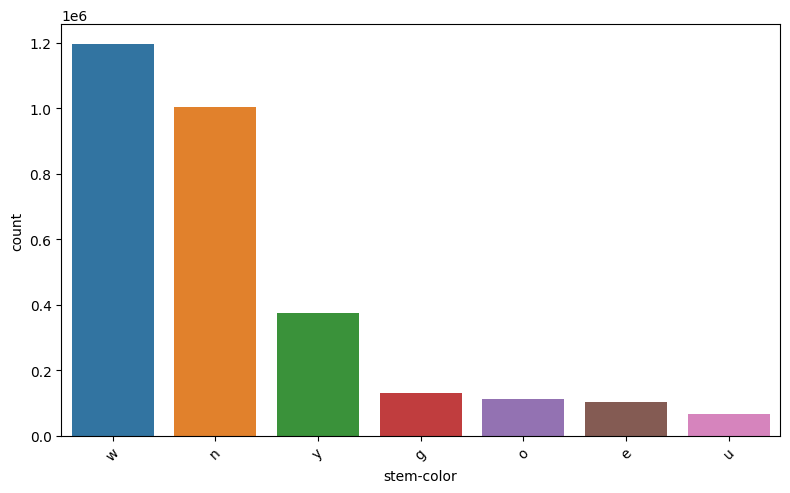

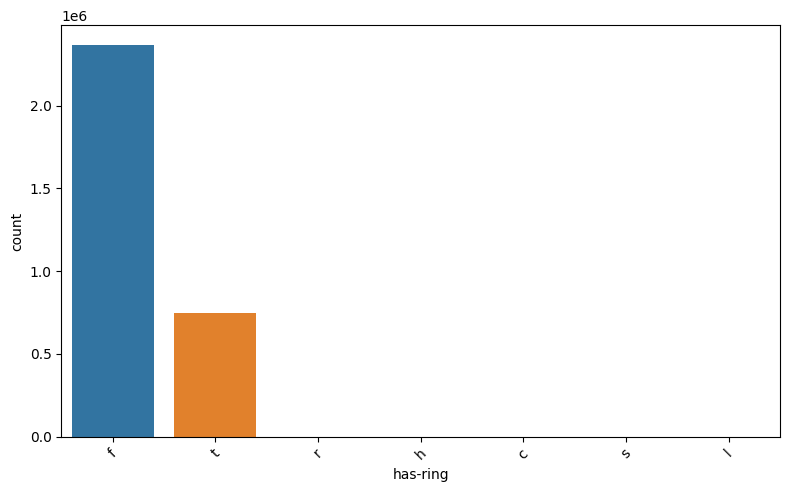

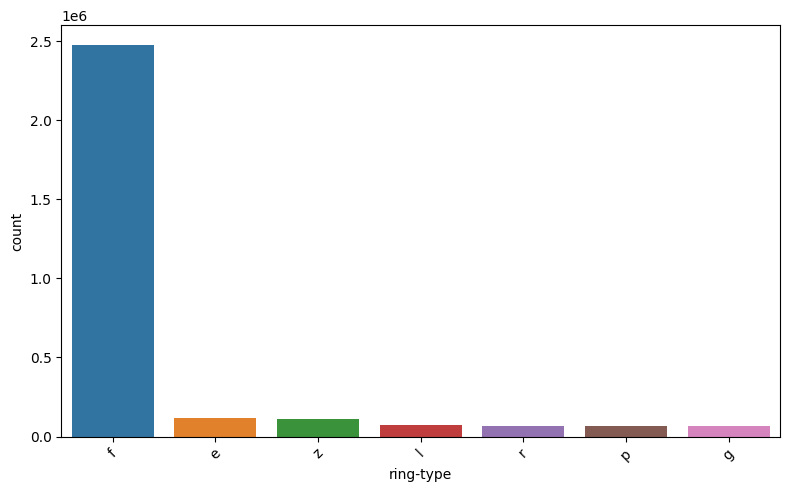

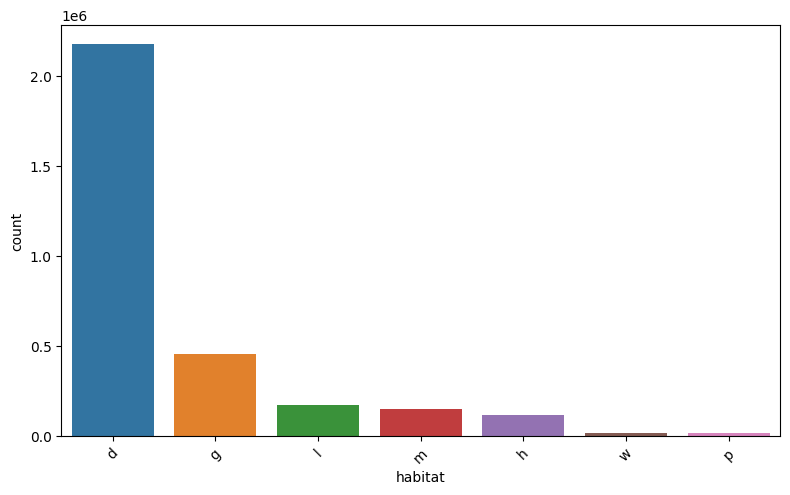

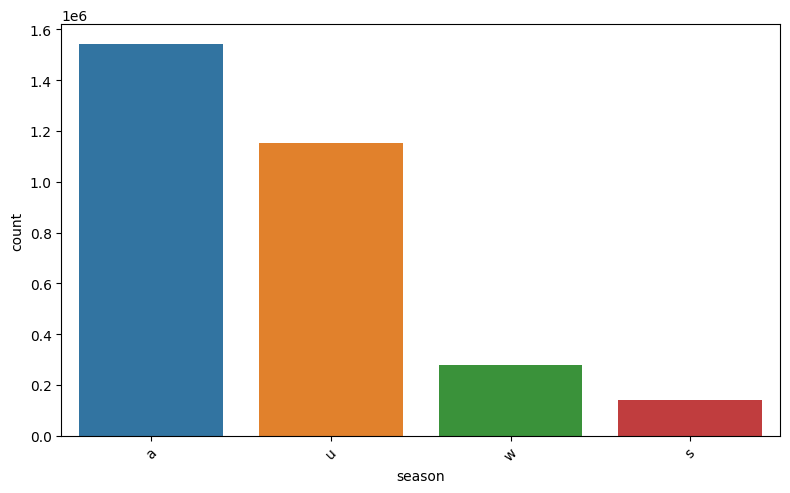

In [17]:
for col in categorical_columns:
    df = train_df[col].value_counts().reset_index()
    df.columns = [col, 'count']
    df = df.sort_values(by='count', ascending=False).head(7)
    
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x=col, y='count')
    plt.tight_layout()



    plt.xticks(rotation=45)
    plt.show()

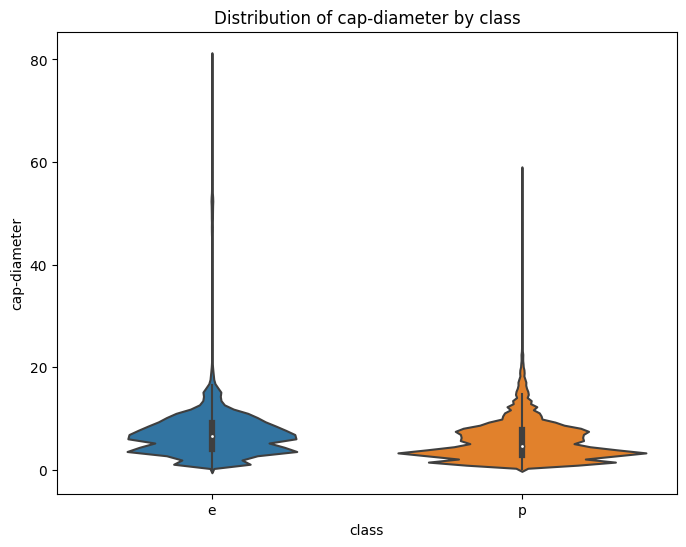

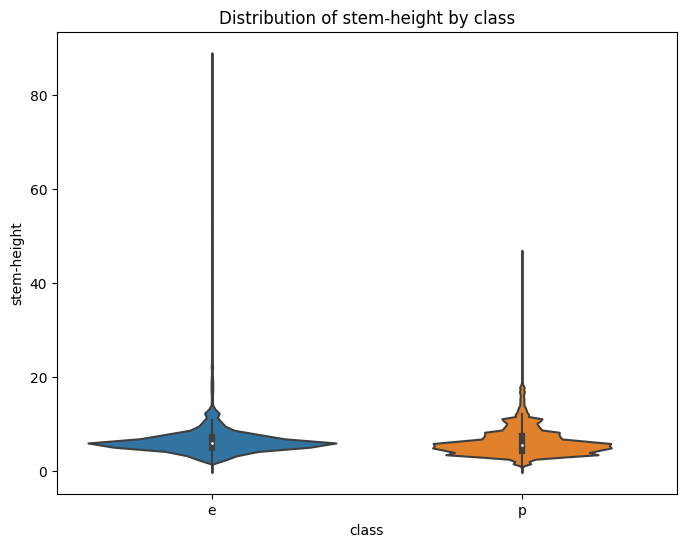

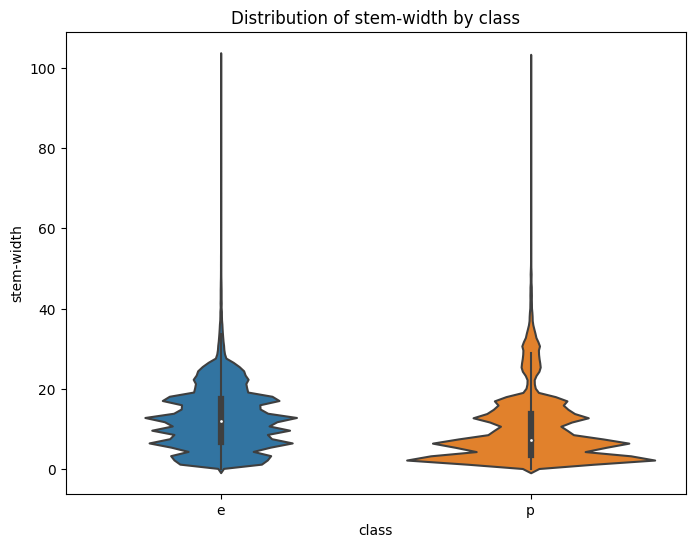

In [18]:
# distribution of numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train_df, x='class', y=column) 
    plt.title(f'Distribution of {column} by class')
    plt.show()

# Importing the libraries for Data Preprocessing and Model Building

In [19]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, LabelEncoder,OneHotEncoder,QuantileTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



# Data Preprocessing

In [20]:
# encode the target calss into numeric
label = LabelEncoder()
train_df['class'] =label.fit_transform(train_df['class'])

In [21]:
# splitting the training dataframe into x(features) and y (target)
X = train_df.drop('class',axis =1)
y = train_df['class']



In [22]:
# Impute missing values according to neighboring values
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))# impute(filling null values) the categorical columns with the mode of their respective columns 
])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_columns),
                                              ('cat', categorical_transformer, categorical_columns)])

X = preprocessor.fit_transform(X)
test_df = preprocessor.transform(test_df)


In [23]:
from sklearn import set_config
set_config(display = 'diagram')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
       'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object'))])

## Scaling Features

XGBoost Algorithm is used for building the Model. Tree Based Model are not Sensitive to feature Scales.XGBoost uses Decision Tress as the base learners , which split data based on feature thresholds. The scale of the Features doesn't impact how the tress make Decisions. XGBoost can Handle Different ranges because the algorithm inherently splits based on the Feature values rather than distances or variances

Algorithms like linear Regression , logistic Regression , KNN , Support vector Machines are more sensitive to feature scales such as Standardisation and Normalization



In [24]:
from sklearn.metrics import matthews_corrcoef
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc


# Model Building

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # training size - 80% , test size -20% 

In [26]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# XGBoost classifier is used for Binary Classification
model =  XGBClassifier(
            reg_alpha = 0.015,
            reg_lambda = 0.1,
            colsample_bytree =  0.4977894587674208,
            subsample  =0.8202477436879304,
            learning_rate = 0.025017073135592028,
            max_depth =20,
            min_child_weight = 7,
            n_estimators = 487,
            objective ='binary:logistic',
            verbosity = 0,
            device = 'cuda',
            


)


XGB = model.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test,y_test)],
    eval_metric=mcc_metric)






[0]	validation_0-logloss:0.67067	validation_0-mcc:0.00000
[1]	validation_0-logloss:0.65112	validation_0-mcc:0.00000
[2]	validation_0-logloss:0.63879	validation_0-mcc:0.00000
[3]	validation_0-logloss:0.62090	validation_0-mcc:0.50270
[4]	validation_0-logloss:0.60783	validation_0-mcc:0.65043
[5]	validation_0-logloss:0.59188	validation_0-mcc:0.80328
[6]	validation_0-logloss:0.57565	validation_0-mcc:0.86990
[7]	validation_0-logloss:0.56083	validation_0-mcc:0.90225
[8]	validation_0-logloss:0.55074	validation_0-mcc:0.91094
[9]	validation_0-logloss:0.54026	validation_0-mcc:0.92205
[10]	validation_0-logloss:0.52712	validation_0-mcc:0.93431
[11]	validation_0-logloss:0.51660	validation_0-mcc:0.93965
[12]	validation_0-logloss:0.50359	validation_0-mcc:0.94651
[13]	validation_0-logloss:0.49387	validation_0-mcc:0.94827
[14]	validation_0-logloss:0.48256	validation_0-mcc:0.95220
[15]	validation_0-logloss:0.47200	validation_0-mcc:0.95520
[16]	validation_0-logloss:0.46466	validation_0-mcc:0.95615
[17]	va

# Evaluating the Model's performance

In [27]:
# validating the model's efficiency with the predicted values of the model with the actual values 
y_pred = XGB.predict(X_test)
score = matthews_corrcoef(y_test ,y_pred)
print('MCC:', score)

MCC: 0.9744861139492192


# Predicting the Test Data

In [28]:
test_predictions = XGB.predict(test_df)
test_predictions = label.inverse_transform(test_predictions) # converting the encoded numerical value into the their actual value

In [29]:
res = pd.DataFrame({'id': df_test['id'],'class': test_predictions})

In [30]:
res.shape

(2077964, 2)

# Submission File

In [31]:
# creating an csv file for submission as submission.csv
res.to_csv('submission.csv', index=False)